# Explore here

In [2]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# modelado (install scikit-learn)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
archivo="https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

df_original = pd.read_csv(archivo, sep=",")
df = pd.read_csv(archivo, sep=",")

df.head()

datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} dato duplicado.")
print()

df.info()


Contamos con 768 cantidad de datos y 9 atributos.

Contamos con 0 dato duplicado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Contamos con 768 datos y 9 atributos.
- No tenemos datos duplicados
- Ninguno de los atributos posee valores nulos.
- 9 características son numéricas, entre las cuales se encuentra nuestra variable objetivo Outcome que está codificada con el valor 0 para quién no posee diabetes y valor 1 para quién sí lo hace.

### Selección de atributos relevantes

Todos los atributos son relevantes para nuestro objetivo.

### Análisis univariado

Variables numéricas:

- Pregnancies: Número de embarazos del paciente.
- Glucose: Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa.
- BloodPressure: Presión arterial diastólica (medida en mm Hg).
- SkinThickness: Grosor del pliegue cutáneo del tríceps (medida en mm).
- Insulin: Insulina sérica de 2 horas (medida en mu U/ml).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad del paciente.
- Outcome [Variable objetivo]: 0 negativo en diabetes; 1 positivo en diabetes.

In [7]:
# Resumen estadístico
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


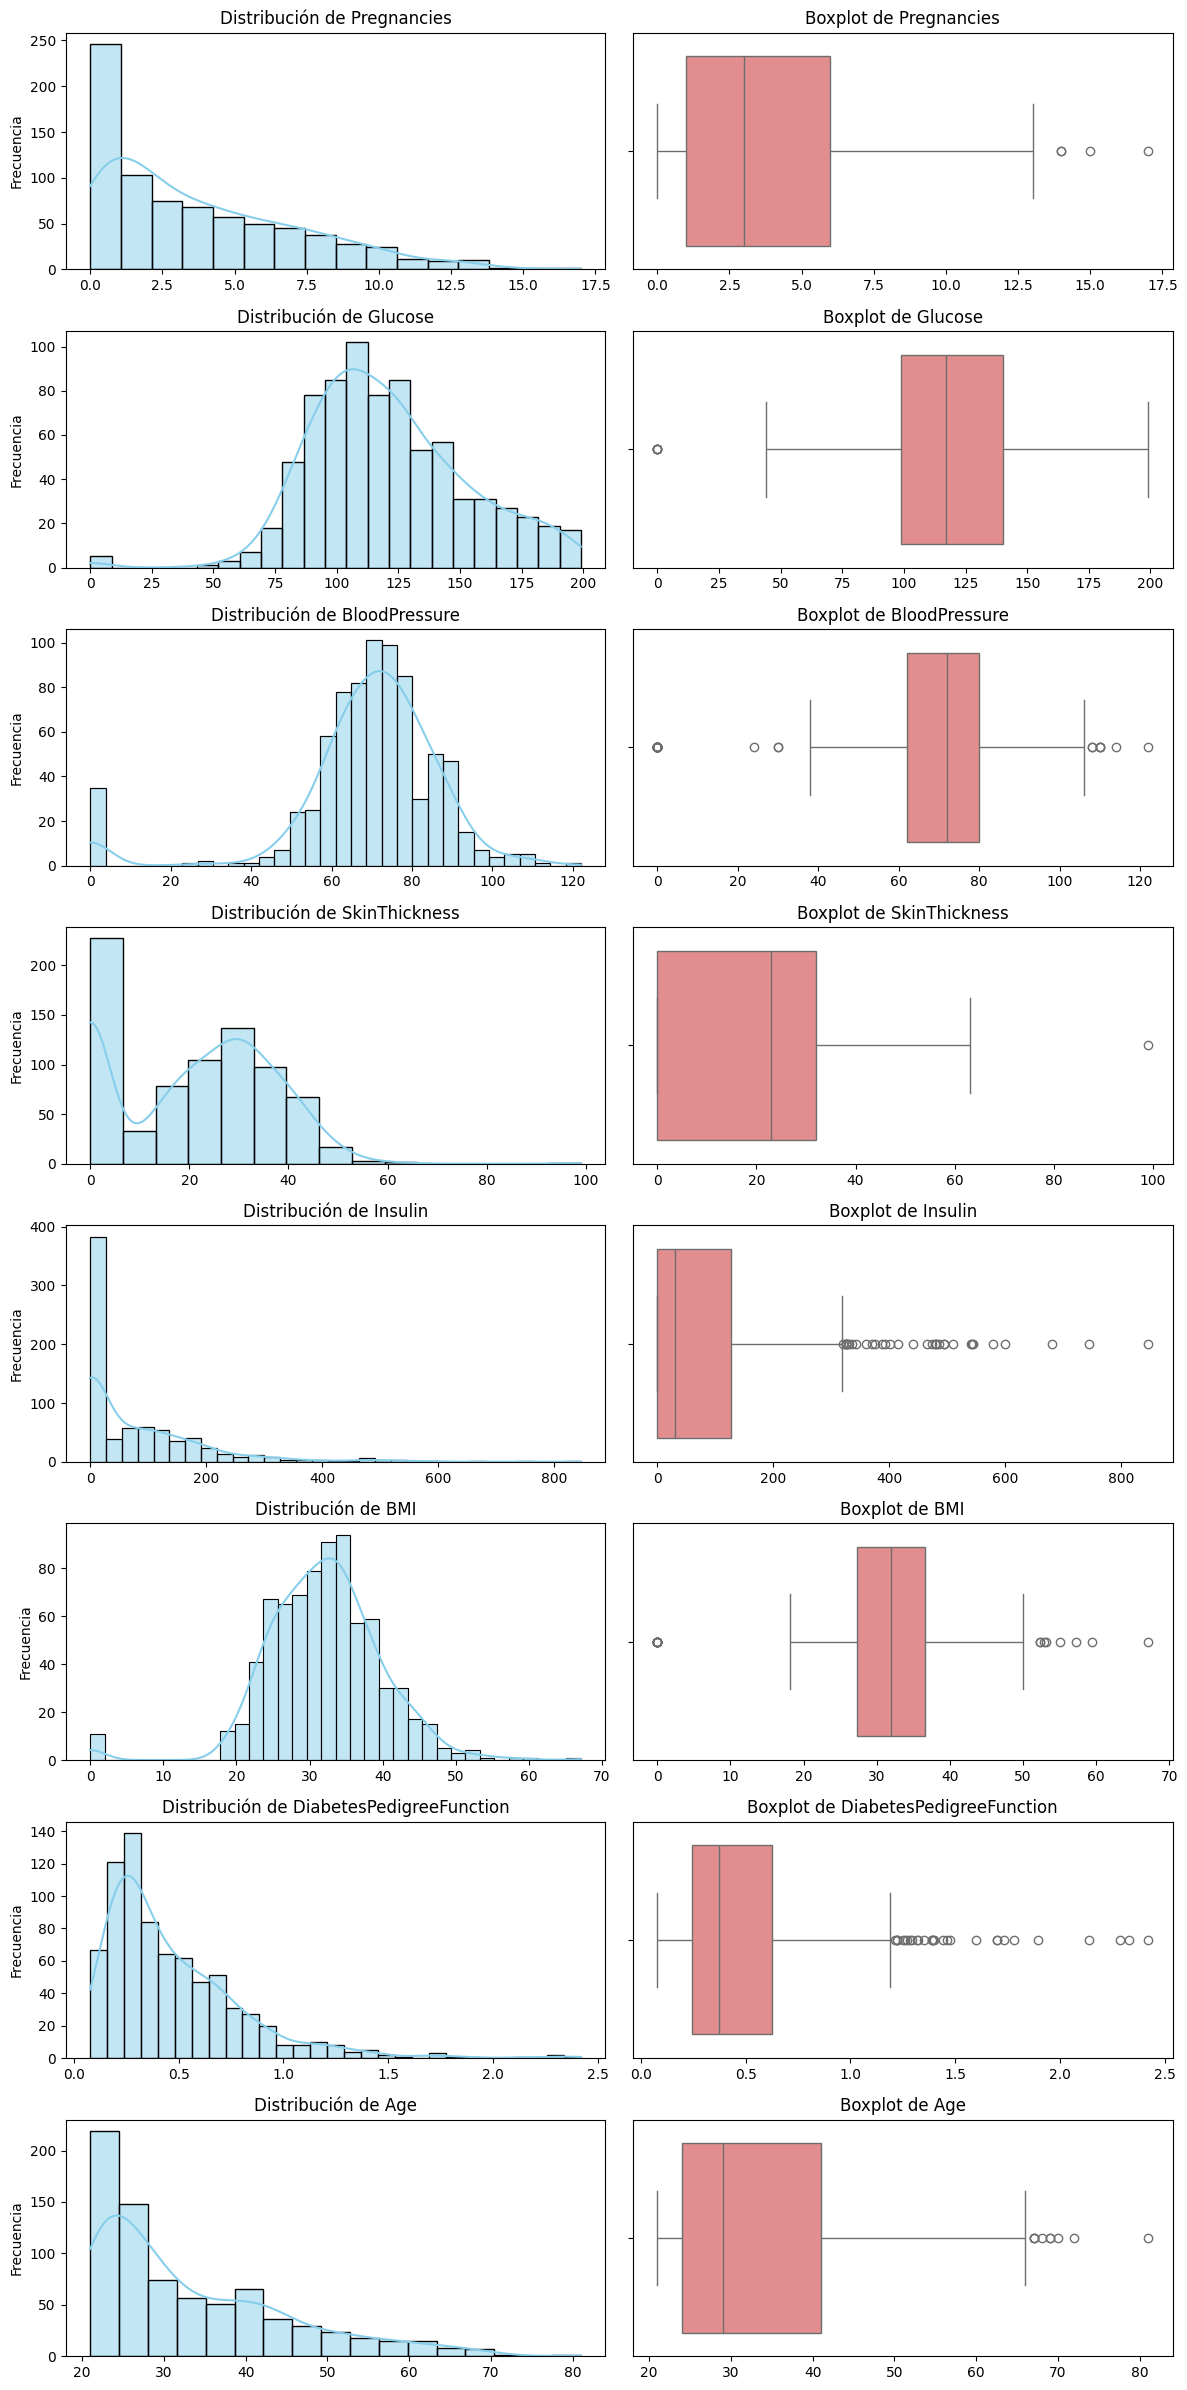

In [13]:
# Variables numéricas
variables = df.columns[:-1] # Sin la variable Outcome.


# Crear una figura con subplots
fig, axes = plt.subplots(len(variables), 2, figsize=(12, len(variables) * 3), 
                         gridspec_kw={'height_ratios': [1] * len(variables)})

# Iterar por cada variable y generar gráficos
for i, var in enumerate(variables):
    # Histograma
    sns.histplot(ax=axes[i, 0], data=df, x=var, kde=True, color='skyblue')
    axes[i, 0].set(title=f"Distribución de {var}", xlabel=None, ylabel="Frecuencia")
    
    # Boxplot
    sns.boxplot(ax=axes[i, 1], data=df, x=var, color='lightcoral')
    axes[i, 1].set(title=f"Boxplot de {var}", xlabel=None, ylabel=None)

# Ajustar diseño
plt.tight_layout()
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


/tmp/ipykernel_3445/2072937578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='pastel')


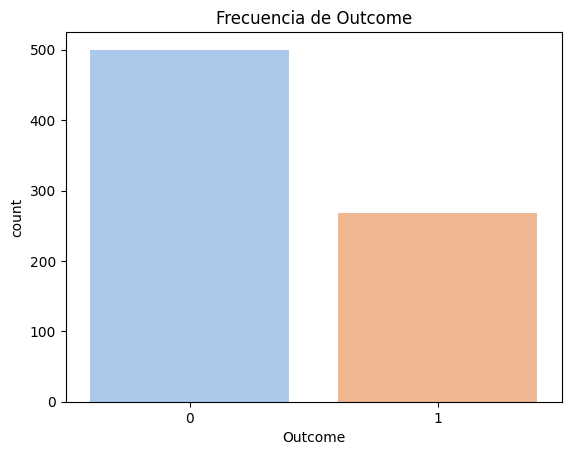

In [12]:
# Frecuencias de Outcome
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

# Visualizar frecuencias
sns.countplot(data=df, x='Outcome', palette='pastel')
plt.title("Frecuencia de Outcome")
plt.show()

### Análisis multivariado

In [16]:
# Agrupar por Outcome y calcular estadísticas
stats_by_outcome = df.groupby("Outcome")[variables].describe().T
stats_by_outcome


Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]

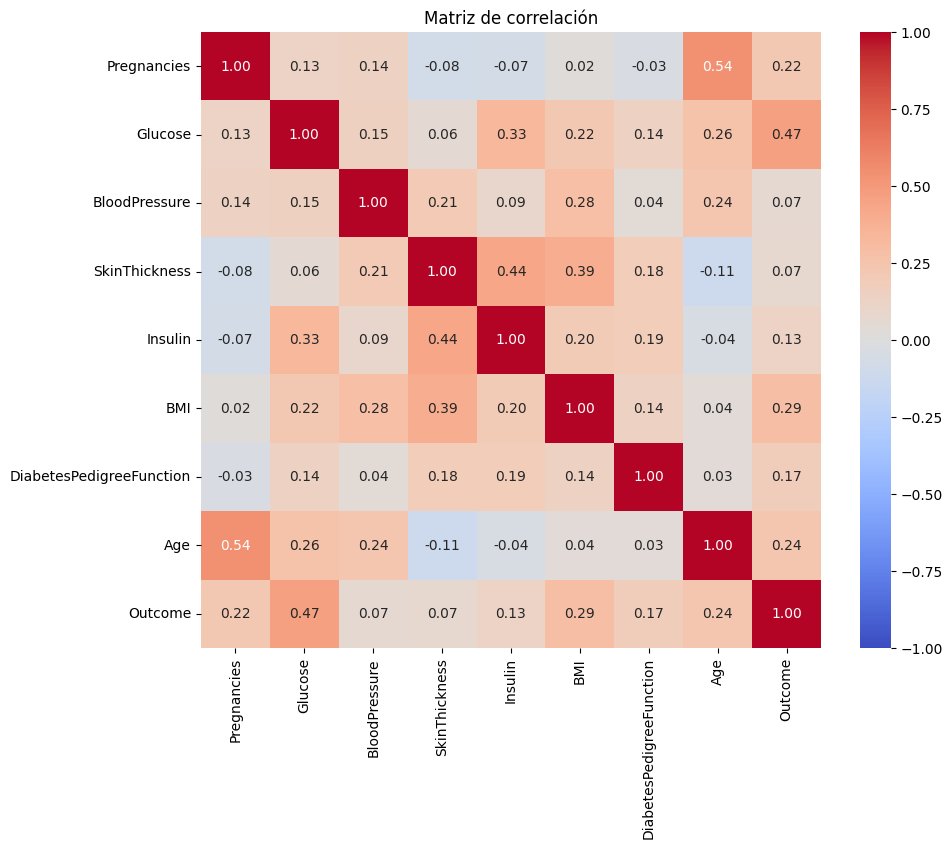

In [18]:
# Crear la matriz de correlación (incluyendo Outcome)
corr_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

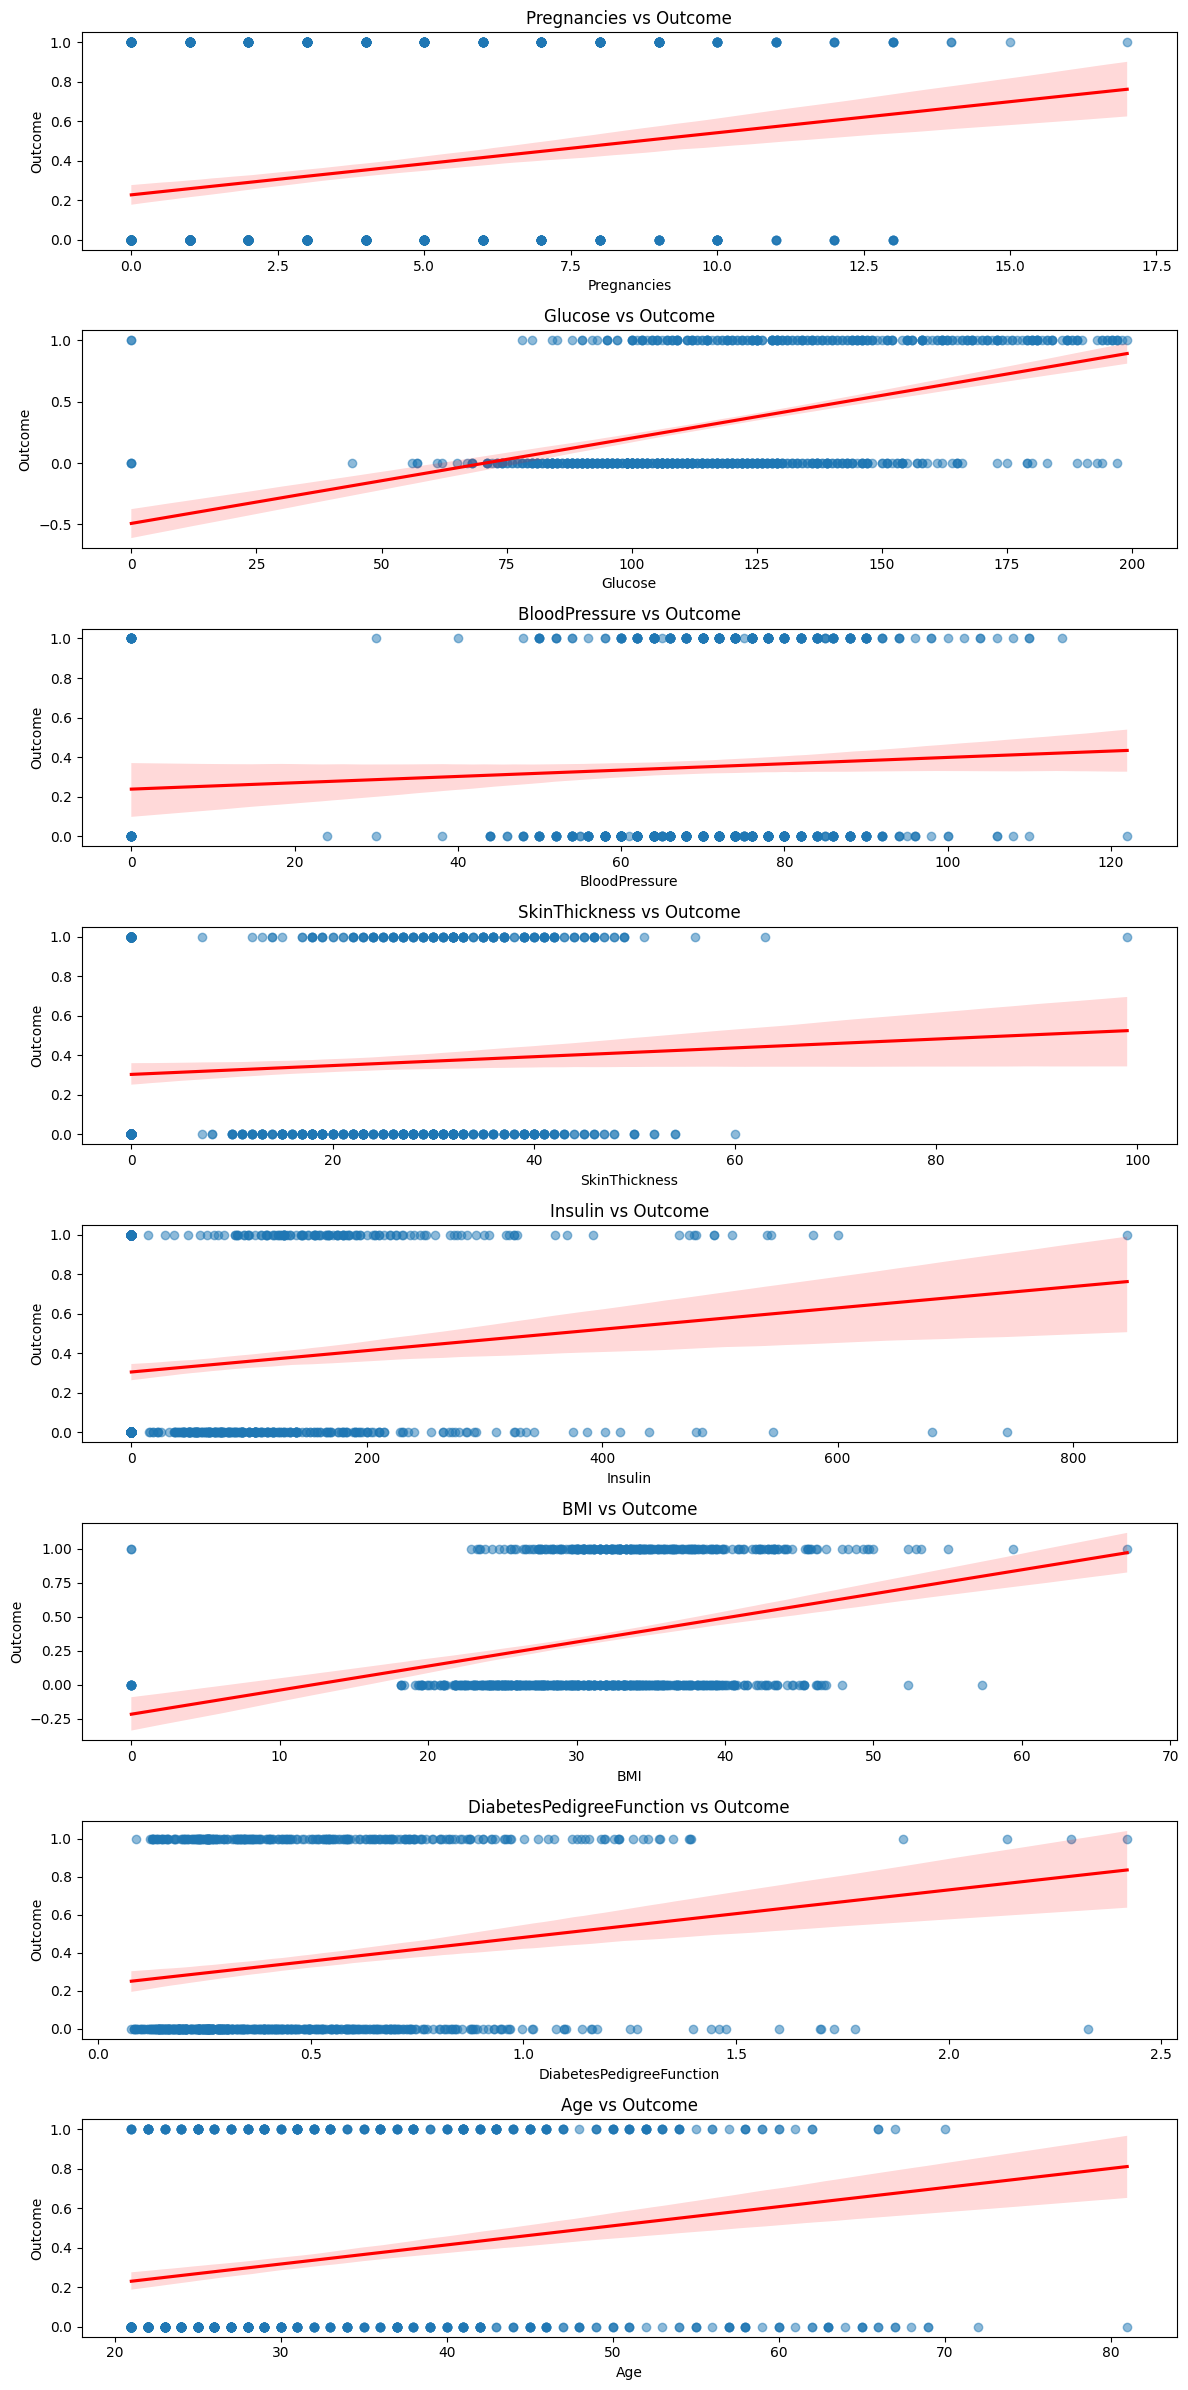

In [22]:
# Crear subplots
fig, axis = plt.subplots(figsize=(12, len(variables) * 3), nrows=len(variables), ncols=1)

# Iterar por cada variable numérica y graficar
for i, var in enumerate(variables):
    sns.regplot(ax=axis[i], data=df, x=var, y="Outcome", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axis[i].set_title(f"{var} vs Outcome", fontsize=12)
    axis[i].set_xlabel(var)
    axis[i].set_ylabel("Outcome")

# Ajustar el layout
plt.tight_layout()
plt.show()

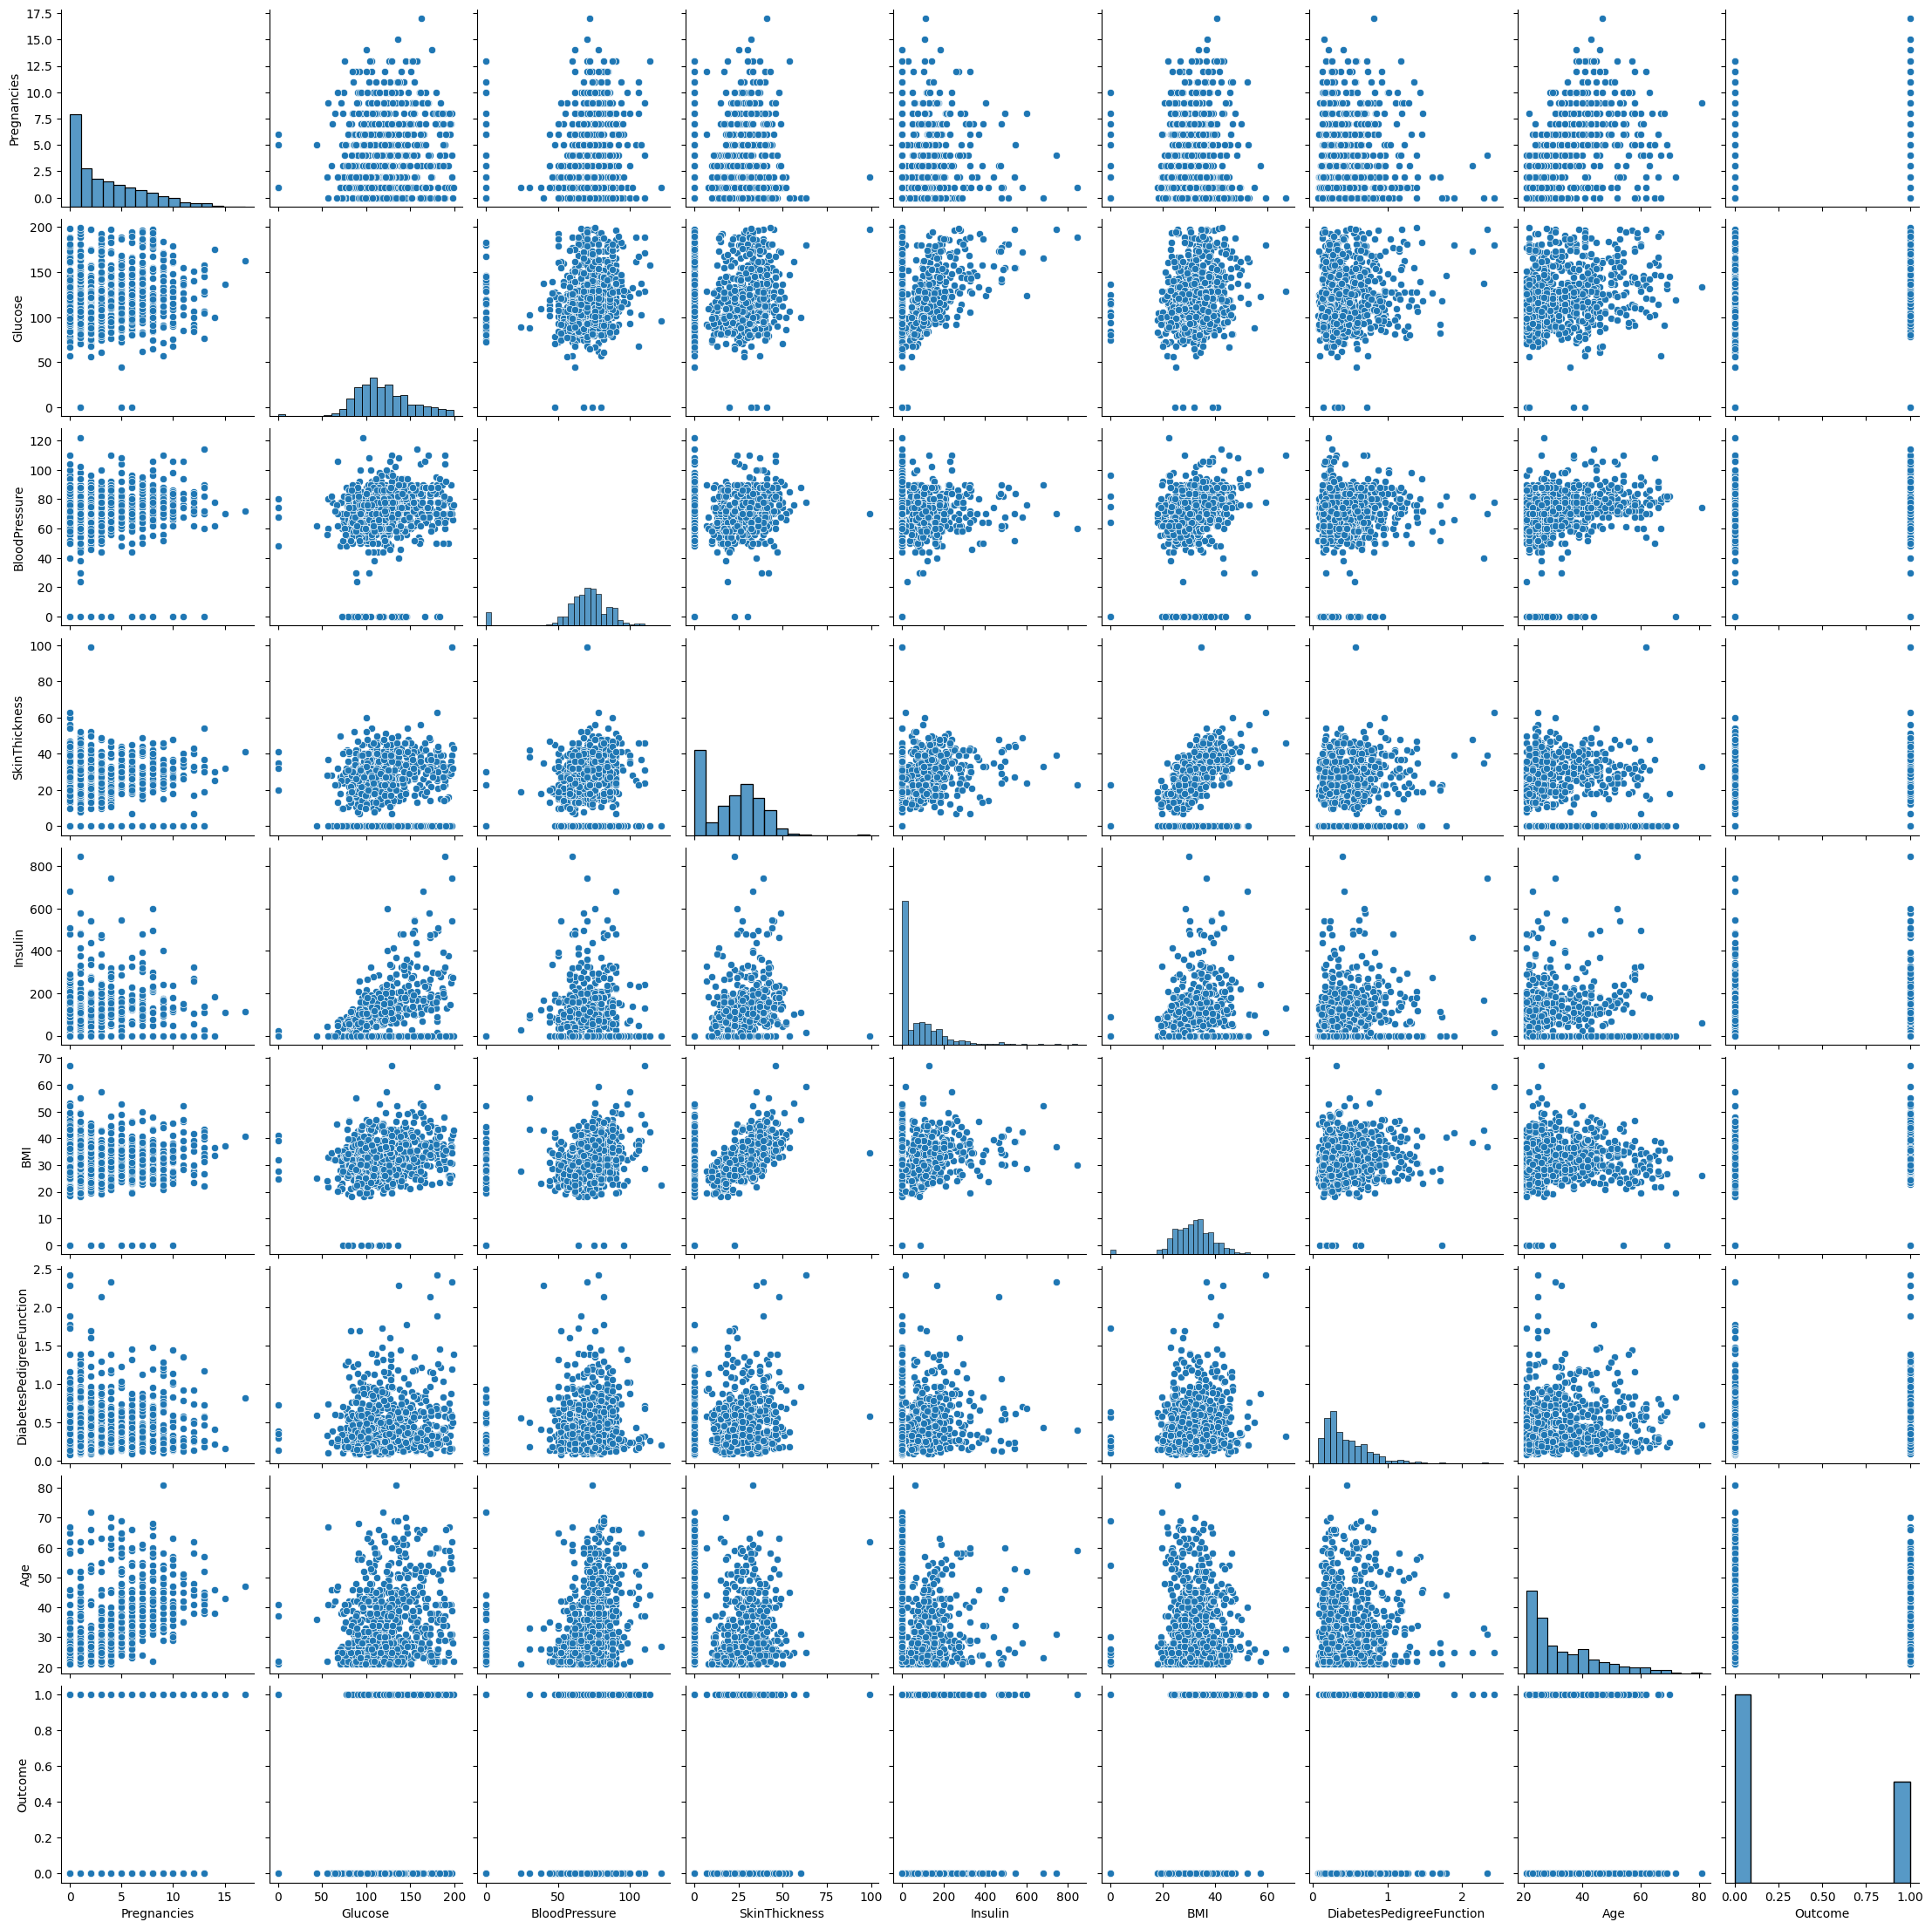

In [23]:
# relaciones todos con todos
sns.pairplot(data = df)

### Valores atípicos

In [24]:
# Función para detectar valores atípicos usando IQR
def detectar_outliers_iqr(data, variables):
    outliers = {}
    for var in variables:
        Q1 = data[var].quantile(0.25)  # Primer cuartil
        Q3 = data[var].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                 # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior

        # Filtrar valores atípicos
        outliers[var] = data[(data[var] < lower_bound) | (data[var] > upper_bound)][var]

    return outliers

# Aplicar la función
outliers_detectados = detectar_outliers_iqr(df, variables)

# Mostrar resumen
for var, outliers in outliers_detectados.items():
    print(f"\nVariable: {var}")
    print(f"Número de valores atípicos: {len(outliers)}")
    print(f"Valores atípicos:\n{outliers.values}")


Variable: Pregnancies
Número de valores atípicos: 4
Valores atípicos:
[15 17 14 14]

Variable: Glucose
Número de valores atípicos: 5
Valores atípicos:
[0 0 0 0 0]

Variable: BloodPressure
Número de valores atípicos: 45
Valores atípicos:
[  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]

Variable: SkinThickness
Número de valores atípicos: 1
Valores atípicos:
[99]

Variable: Insulin
Número de valores atípicos: 34
Valores atípicos:
[543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325
 415 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510]

Variable: BMI
Número de valores atípicos: 19
Valores atípicos:
[ 0.   0.   0.   0.  53.2 55.   0.  67.1 52.3 52.3 52.9  0.   0.  59.4
  0.   0.  57.3  0.   0. ]

Variable: DiabetesPedigreeFunction
Número de valores atípicos: 29
Valores atípicos:
[2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.3